<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/13.00.Aula-Modelos_individuais_multiplas_estruturas-6.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- Modelos individuais estocásticos com múltiplas estruturas de conexão - parte V](12.00.Aula-Modelos_individuais_multiplas_estruturas-5.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 

---


# Modelos individuais estocásticos com múltiplas estruturas de conexão - parte VI

## Objetivos

- Continuar o estudo de **modelos estocásticos individuais espacialmente estruturados e com evolução temporal discreta.**

- Comparar os algoritmos desenvolvidos

**Importando bibliotecas e definindo funções a serem usadas abaixo**

In [1]:
import datetime as dt # date and time tools

import os, sys

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import episiming

In [3]:
dt_string = dt.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 13/May/2020


In [4]:
sns.set_style("darkgrid")

## Cenário anterior com 350 indivíduos

A ideia é que o pacote `episiming` passe a conter diferentes cenários de epidemias, assim como os métodos de evolução da epidemia.

Um dos cenários é o que trabalhamos nas últimas aulas, que contém 350 indivíuos. Este foi chamado de `CenarioPop350`. Está no módulo `episiming.cenarios`.

Vamos considerar, inicialmente, este cenário e comparar as duas implementações de modelos individuais: a versão matricial, inicial, e a versão vetorial, mais recente.

Essas implementações, de modelos individuais, estão no módulo `episiming.individuais`, e são denomidados de `evolucao_matricial` e `evolucão_vetorial`, respectivamente.

Os métodos de modelos compartimentais estão no módulo `episiming.compartimentais`.

### Dados para a simulação

In [5]:
t_0 = 0
dt = 1
num_dt = 60
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 20

### Instanciando o cenário

In [6]:
cenario_pop_350 = episiming.cenarios.Pop350()

### Exibindo as redes do cenário

Memória utilizada pelo grafo: 30.1 Kb
Memória utilizada pela matriz de adjacências: 957.1 Kb
Número de vértices: 350
Número de arestas: 1536
Número de arestas com peso: 1536.0
Número médio de conexões por indivíduo: 8.8
Número médio de conexões por indivíduo com peso: 8.8


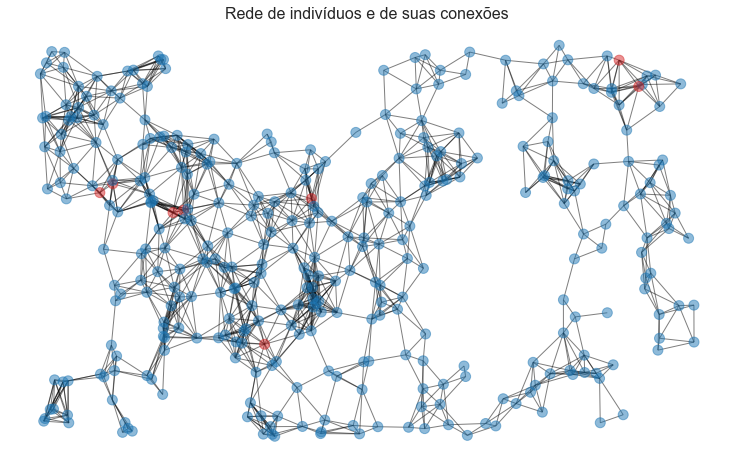

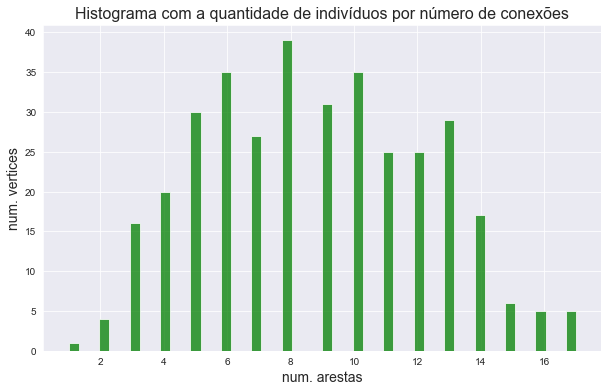

Memória utilizada pelo grafo: 22.9 Kb
Memória utilizada pela matriz de adjacências: 957.1 Kb
Número de vértices: 350
Número de arestas: 610
Número de arestas com peso: 610.0
Número médio de conexões por indivíduo: 3.5
Número médio de conexões por indivíduo com peso: 3.5


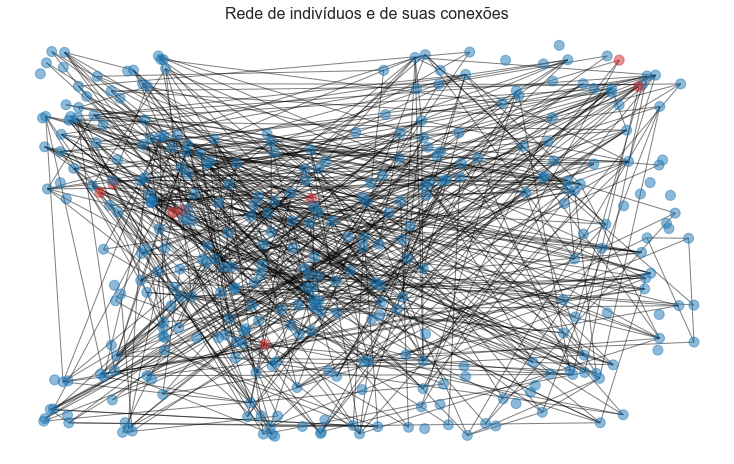

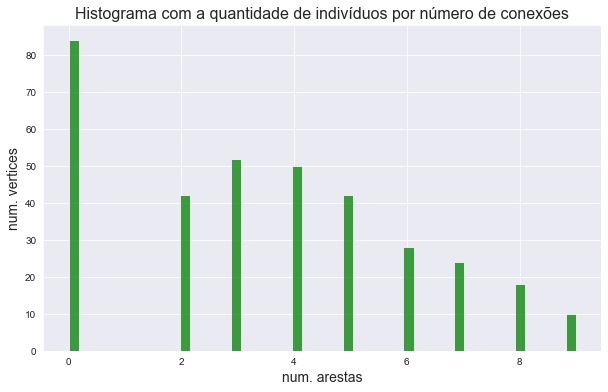

In [7]:
cenario_pop_350.exibe_redes()

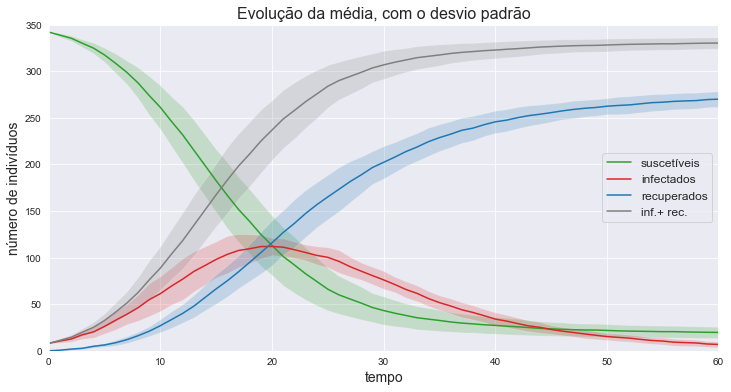

CPU times: user 20.7 s, sys: 35.2 ms, total: 20.7 s
Wall time: 20.8 s


In [8]:
%%time
X_350 = cenario_pop_350.evolui(dados_temporais, num_sim, show='sd')

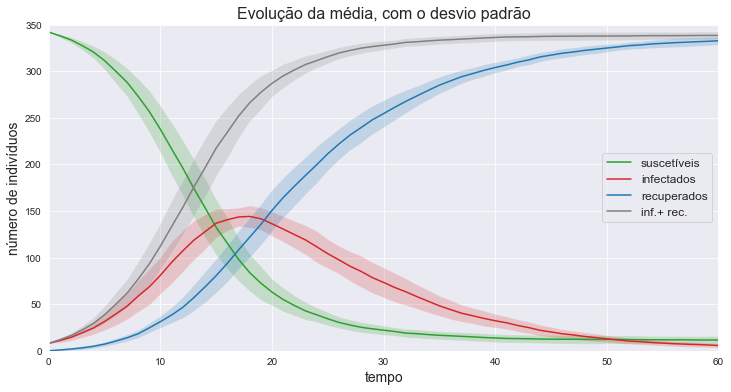

CPU times: user 15.8 s, sys: 377 ms, total: 16.2 s
Wall time: 10.5 s


In [9]:
%%time
X_350_mat = cenario_pop_350.evolui_matricial(dados_temporais, num_sim, show='sd')

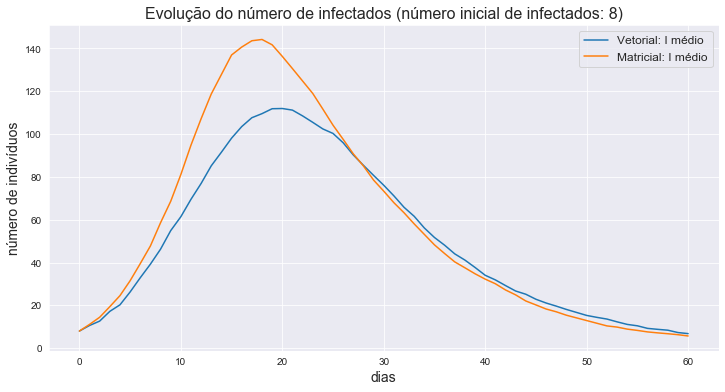

In [10]:
plt.figure(figsize=(12,6))

# exibe os gráficos
plt.plot(tempos, X_350.I_medio, label='Vetorial: I médio')
plt.plot(tempos, X_350_mat.I_medio, label='Matricial: I médio')

# informações para o gráfico
plt.xlabel('dias', fontsize=14)
plt.ylabel('número de indivíduos', fontsize=14)
plt.title(f'Evolução do número de infectados (número inicial de infectados: {cenario_pop_350.num_infectados_0})',
          fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.show()

## Cenário com rede completa

Para testar as implementações do modelo individual, vamos considerar um cenário em que a rede é homogêna, tornando a comparação com o SIR compartimental mais direta.

Neste cenário, desconsideramos as interações aleatórias com a comunidade ($\beta_c=0$) e as interações nas residências ($\beta_r=0$). Completamos fazendo a rede social ser completa (cada indivíduo interage com todos os outros indivíduos) e definindo $\beta_s = \beta$.

### Parâmetros

In [11]:
num_pop = 60
num_infectados_0 = 4
beta = 0.4
gamma = 0.1
pop_sir_0 = [num_pop-num_infectados_0, num_infectados_0, 0]

### Rede

In [12]:
rede_completa = episiming.cenarios.RedeCompleta(num_pop, num_infectados_0, beta, gamma)

In [13]:
def exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim):
    """
    Exibe gráfico comparando as simulações via método SIR compartimental e duas 
    implementações do método individual, versão matricial e vetorial.
    """
    plt.figure(figsize=(12,6))

    # exibe os gráficos
    plt.plot(X_comp.tempos, X_comp.I_medio, label='Individual vetorial: I médio')
    plt.plot(X_comp_mat.tempos, X_comp_mat.I_medio, label='Individual matricial: I médio')
    plt.plot(X_sir.tempos, X_sir.I, label='SIR compartimental: I')

    # informações para o gráfico
    plt.xlabel('dias', fontsize=14)
    plt.ylabel('número de indivíduos', fontsize=14)
    plt.title('Evolução do número de infectados'
              + f'\nnum_infectados_0 = {num_infectados_0}, beta = {beta}, gamma = {gamma}, '
              + f'dt = {dt}, num_dt = {num_dt}, num_sim = {num_sim}',
              fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.show()

### Simulação 1

In [14]:
t_0 = 0
dt = 1
num_dt = int(60/dt)
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 20

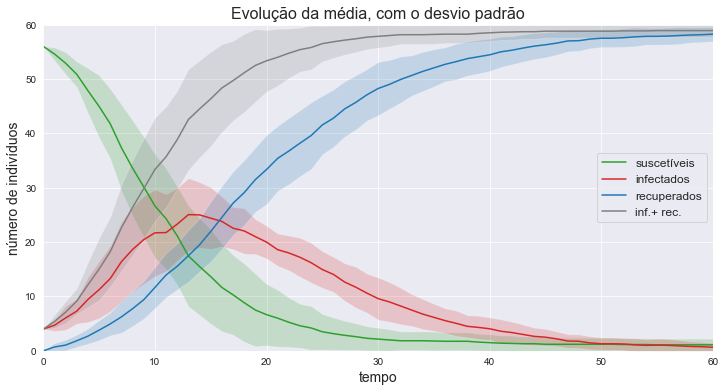

CPU times: user 3.91 s, sys: 15.8 ms, total: 3.92 s
Wall time: 3.92 s


In [15]:
%%time
X_comp = rede_completa.evolui(dados_temporais, num_sim, show='sd')

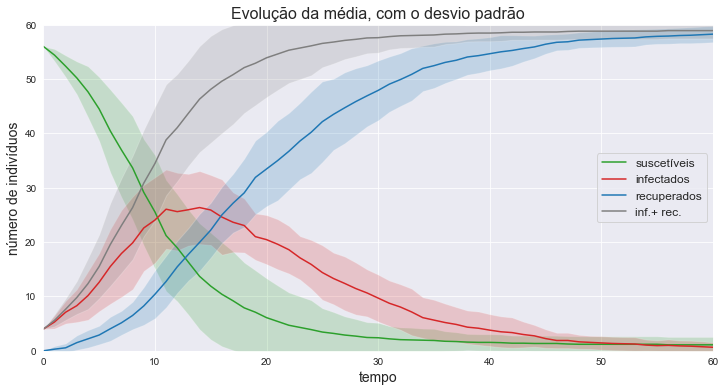

CPU times: user 1.04 s, sys: 7.45 ms, total: 1.05 s
Wall time: 1.05 s


In [16]:
%%time
X_comp_mat = rede_completa.evolui_matricial(dados_temporais, num_sim, show='sd')

In [17]:
X_sir = episiming.compartimentais.evolucao_SIR(pop_sir_0, beta, gamma, tempos)

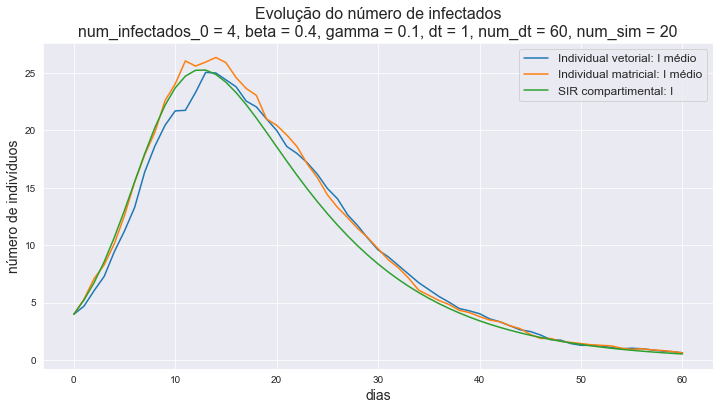

In [18]:
exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

### Simulação 2

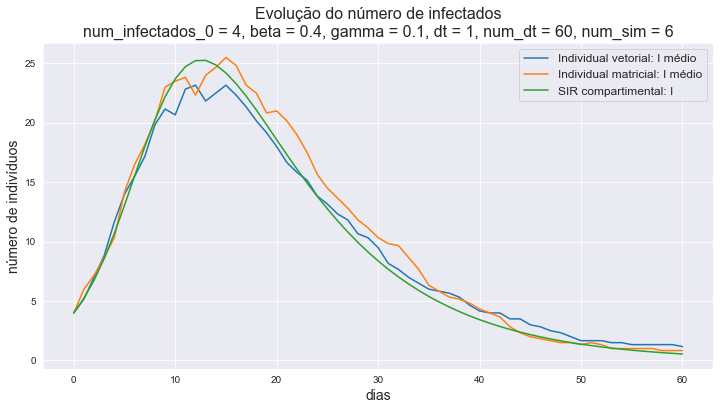

In [19]:
t_0 = 0
dt = 1
num_dt = int(60/dt)
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 6

X_comp = rede_completa.evolui(dados_temporais, num_sim)

X_comp_mat = rede_completa.evolui_matricial(dados_temporais, num_sim)

X_sir = episiming.compartimentais.evolucao_SIR(pop_sir_0, beta, gamma, tempos)

exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

### Simulação 3

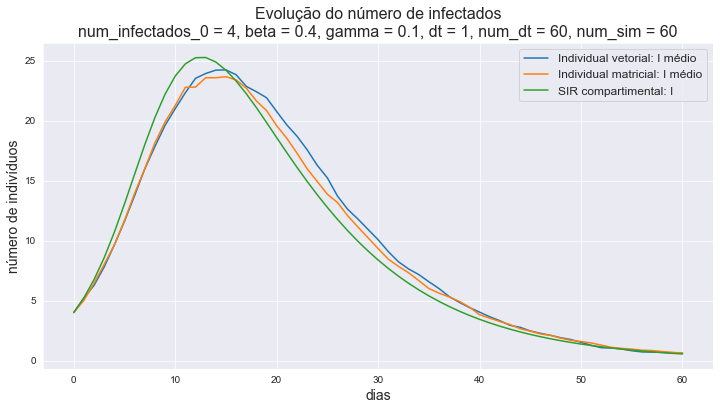

In [20]:
t_0 = 0
dt = 1
num_dt = int(60/dt)
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 60

X_comp = rede_completa.evolui(dados_temporais, num_sim)

X_comp_mat = rede_completa.evolui_matricial(dados_temporais, num_sim)

X_sir = episiming.compartimentais.evolucao_SIR(pop_sir_0, beta, gamma, tempos)

exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

### Simulação 4

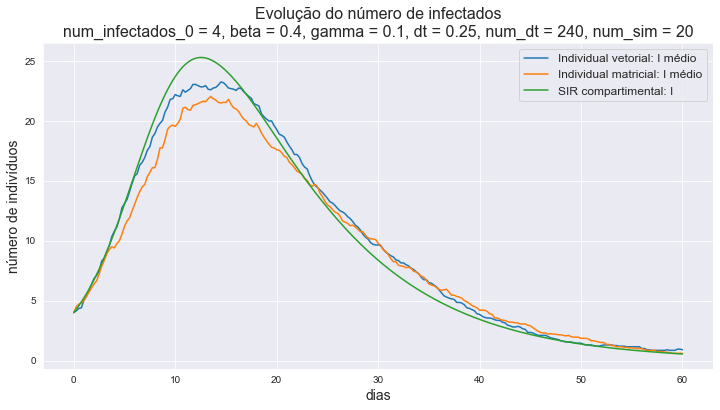

In [21]:
t_0 = 0
dt = 0.25
num_dt = int(60/dt)
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 20

X_comp = rede_completa.evolui(dados_temporais, num_sim)

X_comp_mat = rede_completa.evolui_matricial(dados_temporais, num_sim)

X_sir = episiming.compartimentais.evolucao_SIR(pop_sir_0, beta, gamma, tempos)

exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

### Simulação 5

<Figure size 864x432 with 0 Axes>

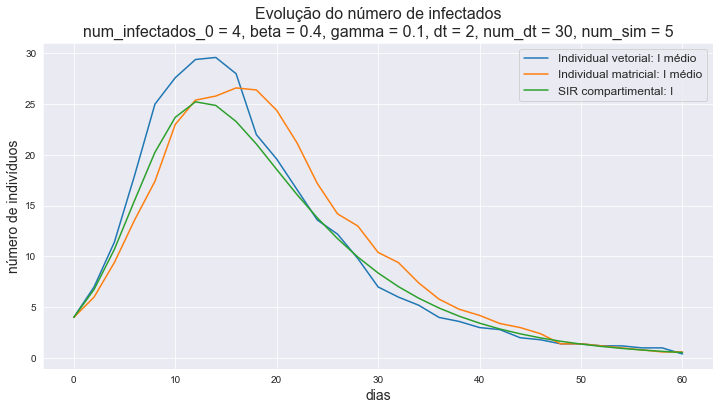

In [22]:
t_0 = 0
dt = 2
num_dt = int(60/dt)
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 5

X_comp = rede_completa.evolui(dados_temporais, num_sim)

X_comp_mat = rede_completa.evolui_matricial(dados_temporais, num_sim)

X_sir = episiming.compartimentais.evolucao_SIR(pop_sir_0, beta, gamma, tempos)

plt.figure(figsize=(12,6))

exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

In [23]:
t_0 = 0
dt = 0.125
num_dt = int(40/dt)
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 100

In [24]:
%%time
X_comp = rede_completa.evolui(dados_temporais, num_sim)

CPU times: user 1min 56s, sys: 801 ms, total: 1min 57s
Wall time: 1min 57s


In [25]:
%%time
X_comp_mat = rede_completa.evolui_matricial(dados_temporais, num_sim)

CPU times: user 19.6 s, sys: 33 ms, total: 19.6 s
Wall time: 19.6 s


In [26]:
X_sir = episiming.compartimentais.evolucao_SIR(pop_sir_0, beta, gamma, tempos)

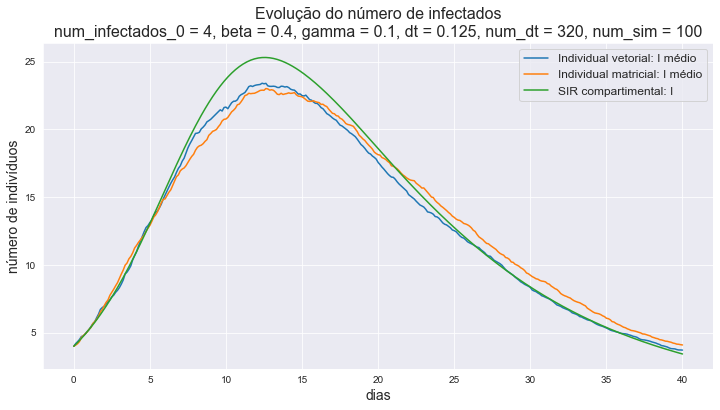

In [27]:
exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

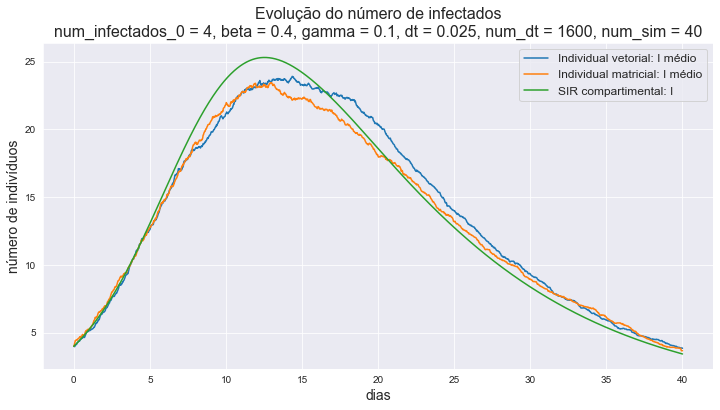

CPU times: user 4min 37s, sys: 1.77 s, total: 4min 39s
Wall time: 4min 38s


In [28]:
%%time
t_0 = 0
dt = 0.025
num_dt = int(40/dt)
T = t_0 + num_dt*dt
dados_temporais = [t_0, dt, num_dt]
tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
num_sim = 40

X_comp = rede_completa.evolui(dados_temporais, num_sim)

X_comp_mat = rede_completa.evolui_matricial(dados_temporais, num_sim)

X_sir = episiming.compartimentais.evolucao_SIR(pop_sir_0, beta, gamma, tempos)

exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

### Detalhamento do modelo

- Usamos o modelo genérico conforme descrito nas [notas suplementares](https://static-content.springer.com/esm/art%3A10.1038%2Fnature04017/MediaObjects/41586_2005_BFnature04017_MOESM1_ESM.pdf) do [Ferguson et al (2005)](#Referências).

- A **região geográfica** é um domínio $\Omega\subset \mathbb{R}^2$.

- A **população total** é um inteiro $N$.

- Há um determinado número de **residências**.

- Há quatro tipos de **lugares** (*places*), $n_p = 1, 2, 3, 4$, com os três primeiros representando tipos de **escola**, segundo a escolarização, e o último, o **local de trabalho**.

- Um **indivíduo** $i\in \{1, \ldots, N\}$ é representado por

    - sua **idade** $a_i$;
    
    - sua **residência** $h_i$ (determinada pela função de densidade populacional e dados de censo da pirâmide etária);

    - seu **local de estudo/trabalho** $l_i^j$;
    
    - o seu **estado** $I_i$, de acordo com $I_i = 1$, se infectado (ou contagioso?), ou $I_i=0$, caso contrário.
    
    - o **grau da infecção** $C_i$, de acordo com $C_i=1$, se severa, ou $C_i=0$, caso contrário. A cada nova infecção, o indivíduo recém-infectado é aleatoriamente selecionado se $C_i=0$ ou $1$, com 50% de chance para cada grau.
    
    - o **instante de infecção** $\tau_i$, indicando o instante em que o indivíduo $i$ se tornou infectado (contagioso?)
    
    - a **força de infecção** $\lambda_i$, detalhada mais abaixo.

- Quantidades derivadas:

    - $n_i$ é o **número de pessoas na residência** do indivíduo $i$;
    
    - $m_i^j$ é o **número de pessoas no mesmo local** do indivíduo $i$.

### Força de infecção

A **força de infecção** $\lambda_i$ de cada indivíduo é dada por

$$ 
  \begin{align*}
    \lambda_i & = \frac{1}{n_i^\alpha}\sum_{k; h_k = h_i}  I_k \beta_h\kappa(t-\tau_k)\rho_k(1 + C_k (\omega-1)) \quad \textrm{(na residência)} \\
    & \quad + \sum_{j, k; l_k^j = l_i^j} \frac{I_k \beta_p^j\kappa(t-\tau_k)\rho_k(1 + C_k(\omega\psi_p^j(t-\tau_\kappa)-1)}{m_i^j} \quad \textrm{(na local de escola/trabalho)} \\
    & \quad + \frac{\sum_k I_k\zeta(a_i)\beta_c\kappa(t-\tau_k)f(d_{ik})\rho_k(1 + C_k (\omega-1))}{\sum_l f(d_{il})} \quad \textrm{(global)},
  \end{align*}
$$

onde

- $i, k$ são índices de indivíduos;

- $j$ é um índice de local;

- $\beta_h$, $\beta_p^j$ e $\beta_c$ são coeficientes de transmissão em **residências**, **locais de trabalho/escola** e em toda a região (rede **global**);

- $\alpha=0.8$ é uma potência para escalonar em função do tamanho da residência;

- $\omega=2$ é um fator de contágio para infecções severas, em relação a não-severas.

- $\kappa=\kappa(s)$ é uma temporal de intensidade 

- $\psi_p^j = \psi_p^j(s) = 0.1, 0.2, 0.25, 0.5$, para $j=1,2,3,4$ e $s>0.25 \;\texttt{dias}$, e $\psi_p^j=0$, caso contrário, são os fatores de taxa de contato, em cada tipo de local, para infecções severas, como função do tempo $s=t-\tau$ desde o início do contágio, **refletindo ao grau de ausência do indivíduo no local.**

- $f(d_{ik})$ é o núcleo de distância e $d_{ik}$ é a distância euclidiana entre os indivíduos $i$ e $k$.

- $\zeta(a_i)$ é a taxa relativa de contato em relação à mobilidade de um indivíduo com idade $a_i$.

- $\rho_k = 1$ é a taxa relativa de infecção do indivíduo $k$. (Mais geralmente $\rho_k$ pode ser dado por uma distribuição gama com média $1$ e fator de forma $\alpha=0.2$.)

## Questões para a adaptação ao Rio de Janeiro

- Distribuição de **habitantes por quilômetro quadrado** (ou, pra começar, por bairros) (datascan, ibge?)

- Número de **habitantes por residência** (censo?)

- Distribuição de **idades por número de habitantes nas residências** (censo, prefeitura?)

- Distribuição do **número de indivíduos nos locais de escola/trabalho** (censo, prefeitura?)

- Considerar apenas **um nível de escola**?

- **Parâmetros** $a$ e $b$ do núcleo de decaimento em função da distância (prefeitura)

# Referências

- [Imperial College COVID-19 Response Team (16/mar/2020), Impact of non-pharmaceutical interventions (NPIs) to reduce COVID- 19 mortality and healthcare demand, 16 de março de 2020 (Free Download).](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-NPI-modelling-16-03-2020.pdf)

- [Ferguson, N. M. et al. (2005), Strategies for containing an emerging influenza pandemic
in Southeast Asia, Nature 437, 209-214.](https://pubmed.ncbi.nlm.nih.gov/16079797/) (Link para download [aqui](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.452.235&rep=rep1&type=pdf) disponibilizado por [CiteSeerX](http://citeseerx.ist.psu.edu/); veja, também, as [notas suplementares](https://static-content.springer.com/esm/art%3A10.1038%2Fnature04017/MediaObjects/41586_2005_BFnature04017_MOESM1_ESM.pdf).)


- [Ferguson NM, Cummings DAT, Fraser C, Cajka JC, Cooley PC, Burke DS (2006). Strategies for mitigating an influenza pandemic. Nature 442 (7101), 448–52 (Free Download)](https://pubmed.ncbi.nlm.nih.gov/16642006/); veja, também, as [notas suplementares](https://www.nature.com/articles/nature04795#Sec2). 

- [Halloran ME, Ferguson NM, Eubank S, et al (2008), Modeling targeted layered containment of an influenza pandemic in the United States. Proc Natl Acad Sci U S A 105 (12), 4639–44 (Free Download)](https://pubmed.ncbi.nlm.nih.gov/18332436/); veja, também, o [suplemento do artigo](https://www.pnas.org/content/suppl/2008/02/28/0706849105.DC1).

- [Landscan data](https://landscan.ornl.gov/): dados da distribuição global da população, com resolução da ordem de $1\,km^2$ ($30''\times 30''$).

- [M. J. Keeling & P. Rohani (2007), Modeling Infectious Diseases in Humans and Animals, Princeton University Press.](https://press.princeton.edu/books/hardcover/9780691116174/modeling-infectious-diseases-in-humans-and-animals)

- [I. Z. Kiss, J. Miller & P. L. Simon (2017), Mathematics of Epidemics on Networks: From Exact to Approximate Models, Springer-Verlag.](https://www.springer.com/br/book/9783319508047)

Veja a página [Imperial College - Covid 19](https://www.imperial.ac.uk/mrc-global-infectious-disease-analysis/covid-19/) para mais relatórios, publicações e outras informações do Imperial College.

<!--NAVIGATOR-->

---
[<- Modelos individuais estocásticos com múltiplas estruturas de conexão - parte V](12.00.Aula-Modelos_individuais_multiplas_estruturas-5.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 